### <div style="text-align:center;background-color: pink; padding: 20px;color: Black"> <b>Feature selection</b></div>

# <b>``Feature selection``<b> 
It is a technique used in machine learning to identify and select the most relevant and informative features from a dataset. The goal of feature selection is to improve the performance and accuracy of machine learning models by reducing the dimensionality of the data and removing irrelevant or redundant features.

##### The <b>`curse of dimensionality`</b> refers to the fact that many machine learning algorithms face significant challenges when dealing with high-dimensional data. As the number of dimensions (or features) in a dataset increases, the volume of the data space grows exponentially, making it difficult to obtain a representative sample of the data and to accurately estimate relationships between variables.



<span style='color:pink'>This can lead to several issues, including</span>

- `Sparsity`: As the number of dimensions increases, the available data become more sparse, making it difficult to identify patterns and relationships in the data.


- `Overfitting:` High-dimensional data can lead to overfitting, where a machine learning model becomes overly complex and fits the noise in the data instead of the underlying patterns.

- `Increased computational complexity: ` As the dimensionality of the data increases, the computational requirements for processing and analyzing the data also increase, leading to slower training times and increased resource usage.

> **To address the curse of dimensionality, several techniques can be used, including feature selection, dimensionality reduction, and regularization. These techniques can help to reduce the number of features and improve the performance and efficiency of machine learning models when dealing with high-dimensional data.**

# Duplicate Features



# `Variance Threshold Feature Selection`
Variance threshold feature selection is a filter-based method for selecting features in machine learning that is based on the variance of each feature in the dataset. The method discards features with low variance, as they are less informative for the classification task.

##### `The Concept of Variance`
Variance is a measure of how much the values of a feature vary from the mean. Features with high variance have a wide range of values, while features with low variance have a narrow range of values.

#### `Constant Features`
Features that have the same value for all instances in the dataset are known as constant features. Constant features have zero variance, as the values do not vary at all. Such features are not informative for the classification task and can be safely removed from the dataset.

#### `Quasi-Constant Features`
Quasi-constant features are features that have almost the same value for almost all samples in the dataset. These features have very low variance and are also not informative for the machine learning model. They can be removed from the dataset using the Variance Threshold method.

To determine whether a feature is quasi-constant, we can set a threshold for the variance and remove all features with variance below that threshold. A commonly used threshold is 0.01, which means that features with more than 99% of the same value are removed.



### `Variance Thresholding`
The variance thresholding method works by setting a threshold for the minimum variance of features. Features with variance below the threshold are discarded, while features with variance above the threshold are retained.

The appropriate value for the threshold depends on the dataset and the classification task. A higher threshold value retains fewer features, while a lower threshold value retains more features.

### `Interactive Demonstration`
Let's now explore the concept of variance thresholding using an interactive demonstration. We will use the Breast Cancer Wisconsin dataset from scikit-learn and apply variance thresholding to the dataset.

First, let's import the necessary libraries and load the dataset.

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data['data'], columns=data['feature_names'])

Now, let's apply variance thresholding to the dataset using scikit-learn's VarianceThreshold class.

In [2]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_new = selector.fit_transform(df)
print(f"Number of features before thresholding: {df.shape[1]}")
print(f"Number of features after thresholding: {X_new.shape[1]}")

Number of features before thresholding: 30
Number of features after thresholding: 14


In [3]:
# it returns output in array form so make sure column names are copy beform applying this method.

We have set the threshold value to 0.01, which means that features with variance below 0.01 will be discarded. Let's see how many features are retained and how many are discarded.We can see that the variance thresholding method has discarded 16 features with low variance, retaining only 14 informative features.

In [4]:
import matplotlib.pyplot as plt

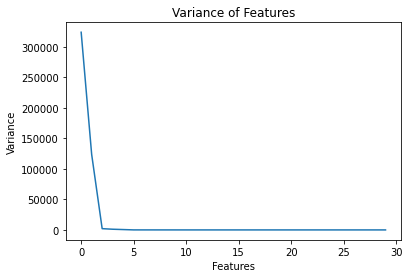

In [5]:
variances = df.var()

# plot variances
plt.plot(sorted(variances, reverse=True))
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Features')
plt.show()

# Points to Consider
1. Ignores Target Variable: Variance Threshold is a univariate method, meaning it
evaluates each feature independently and doesn't consider the relationship between
each feature and the target variable. This means it may keep irrelevant features that
have a high variance but no relationship with the target, or discard potentially useful
features that have a low variance but a strong relationship with the target.


2. Ignores Feature Interactions: Variance Threshold doesn't account for interactions
between features. A feature with a low variance may become very informative when
combined with another feature.


3. Sensitive to Data Scaling: Variance Threshold is sensitive to the scale of the data. If
features are not on the same scale, the variance will naturally be higher for features
with larger values. Therefore, it is important to standardize the features before
applying Variance Threshold.


4. Arbitrary Threshold Value: It's up to the user to define what constitutes a "low"
variance. The threshold is not

# <span style='color:pink'> Correlation-based Feature Selection </span>
Correlation-based feature selection is a filter-based method for selecting features in machine learning that is based on the correlation between features. The method discards features that are highly correlated with other features, as they provide redundant information and can negatively impact the performance of the machine learning model.

### `The Concept of Correlation`
Correlation is a statistical measure that describes the relationship between two variables. In the context of feature selection, correlation is used to measure the relationship between each pair of features in the dataset.

### ``Pearson's Correlation Coefficient``
The most common measure of correlation is Pearson's correlation coefficient, which is a value between -1 and 1 that describes the linear relationship between two variables. A correlation coefficient of 1 indicates a perfect positive correlation, a correlation coefficient of -1 indicates a perfect negative correlation, and a correlation coefficient of 0 indicates no correlation.

### `Correlation-based Feature Selection`
The correlation-based feature selection method works by calculating the correlation between each pair of features in the dataset and selecting the features that are least correlated with other features.

The appropriate threshold for the correlation coefficient depends on the dataset and the classification task. A higher threshold value retains fewer features, while a lower threshold value retains more features.

In [14]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the breast cancer dataset into a Pandas dataframe
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
df = pd.concat([X, y], axis=1)

# Compute the correlation coefficients between each feature and the target variable (target)
corr_matrix = df.corr()
corr_with_target = corr_matrix['target']

# Sort the correlation coefficients in descending order
corr_sorted = corr_with_target.abs().sort_values(ascending=False)

# Select the top-ranked features based on the correlation coefficients
relevant_features = corr_sorted[1:4].index.tolist()

# Print the relevant features
print(relevant_features)


['worst concave points', 'worst perimeter', 'mean concave points']


In [7]:
corr_matrix['target'].abs().sort_values(ascending=False)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [8]:
import numpy as np 


In [9]:
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr = corr_matrix.abs() > 0.8
mask &= high_corr

# Find the indices of the variables to remove
to_remove = [column for column in high_corr.columns if any(high_corr[column])]



In [10]:

# Compute the correlation matrix
corr_matrix =df.corr().abs()

# Create a mask for highly correlated variables
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr = corr_matrix.where(mask)
to_drop = [column for column in high_corr.columns if any(high_corr[column] > 0.95)]

In [11]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(set(columns_to_drop)))

7


In [13]:
corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [18]:

# Compute the correlation matrix
corr_matrix =df.corr().abs()


In [23]:
corr_matrix.shape

(30, 30)

In [20]:

# Create a mask for highly correlated variables
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)


In [24]:
high_corr = corr_matrix.where(mask)


In [25]:
high_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [36]:
to_drop = [column for column in high_corr.columns if any(high_corr[column] > 0.95)]

In [26]:
high_corr.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

--Expweirment


In [35]:
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
         if corr_matrix.loc[columns[i], columns[j]] > 0.95:
              print(columns[i],columns[j])

mean radius mean perimeter
mean radius mean area
mean radius worst radius
mean radius worst perimeter
mean perimeter mean area
mean perimeter worst radius
mean perimeter worst perimeter
mean area worst radius
mean area worst perimeter
mean area worst area
radius error perimeter error
radius error area error
worst radius worst perimeter
worst radius worst area
worst perimeter worst area


In [37]:
to_drop

['mean perimeter',
 'mean area',
 'perimeter error',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area']

In [38]:
corr_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
